In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
import pickle

In [2]:
df= pd.read_csv('train.csv')
df.head(3)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0


In [3]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [5]:
for i in df.columns:
    if df[i].dtypes!='object':
        print('Maximum value of column {} is : {} \n'.format(i, max(df[i])))

Maximum value of column age is : 55 

Maximum value of column no_of_children is : 9.0 

Maximum value of column net_yearly_income is : 140759012.73 

Maximum value of column no_of_days_employed is : 365252.0 

Maximum value of column total_family_members is : 10.0 

Maximum value of column migrant_worker is : 1.0 

Maximum value of column yearly_debt_payments is : 328112.86 

Maximum value of column credit_limit is : 31129970.49 

Maximum value of column credit_limit_used(%) is : 99 

Maximum value of column credit_score is : 949.0 

Maximum value of column prev_defaults is : 2 

Maximum value of column default_in_last_6months is : 1 

Maximum value of column credit_card_default is : 1 



In [6]:
dtypes = {'age' : np.int8,
          'no_of_children': np.float16,
          'gender' :'category',
          'owns_car' : 'category',
          'owns_house' : 'category',
          'occupation_type' : 'category',
          'net_yearly_income': np.float32,
          'no_of_days_employed' : np.float32,
          'total_family_members': np.float32,
          'migrant_worker' : np.float16,
          'credit_limit_used(%)' : np.float32,
          'credit_score' : np.float32,
          'prev_defaults' : np.int16,
          'column default_in_last_6months': np.int8,
          'credit_card_default': 'int8'}

In [7]:
'''This can significantly reduced the memory usage'''
df=pd.read_csv('train.csv', dtype=dtypes)

In [8]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customer_id              45528 non-null  object  
 1   name                     45528 non-null  object  
 2   age                      45528 non-null  int8    
 3   gender                   45528 non-null  category
 4   owns_car                 44981 non-null  category
 5   owns_house               45528 non-null  category
 6   no_of_children           44754 non-null  float16 
 7   net_yearly_income        45528 non-null  float32 
 8   no_of_days_employed      45065 non-null  float32 
 9   occupation_type          45528 non-null  category
 10  total_family_members     45445 non-null  float32 
 11  migrant_worker           45441 non-null  float16 
 12  yearly_debt_payments     45433 non-null  float64 
 13  credit_limit             45528 non-null  float64 
 14  credit

## There has been a significant reduce from  20.7 MB to 8.2 MB

<AxesSubplot:>

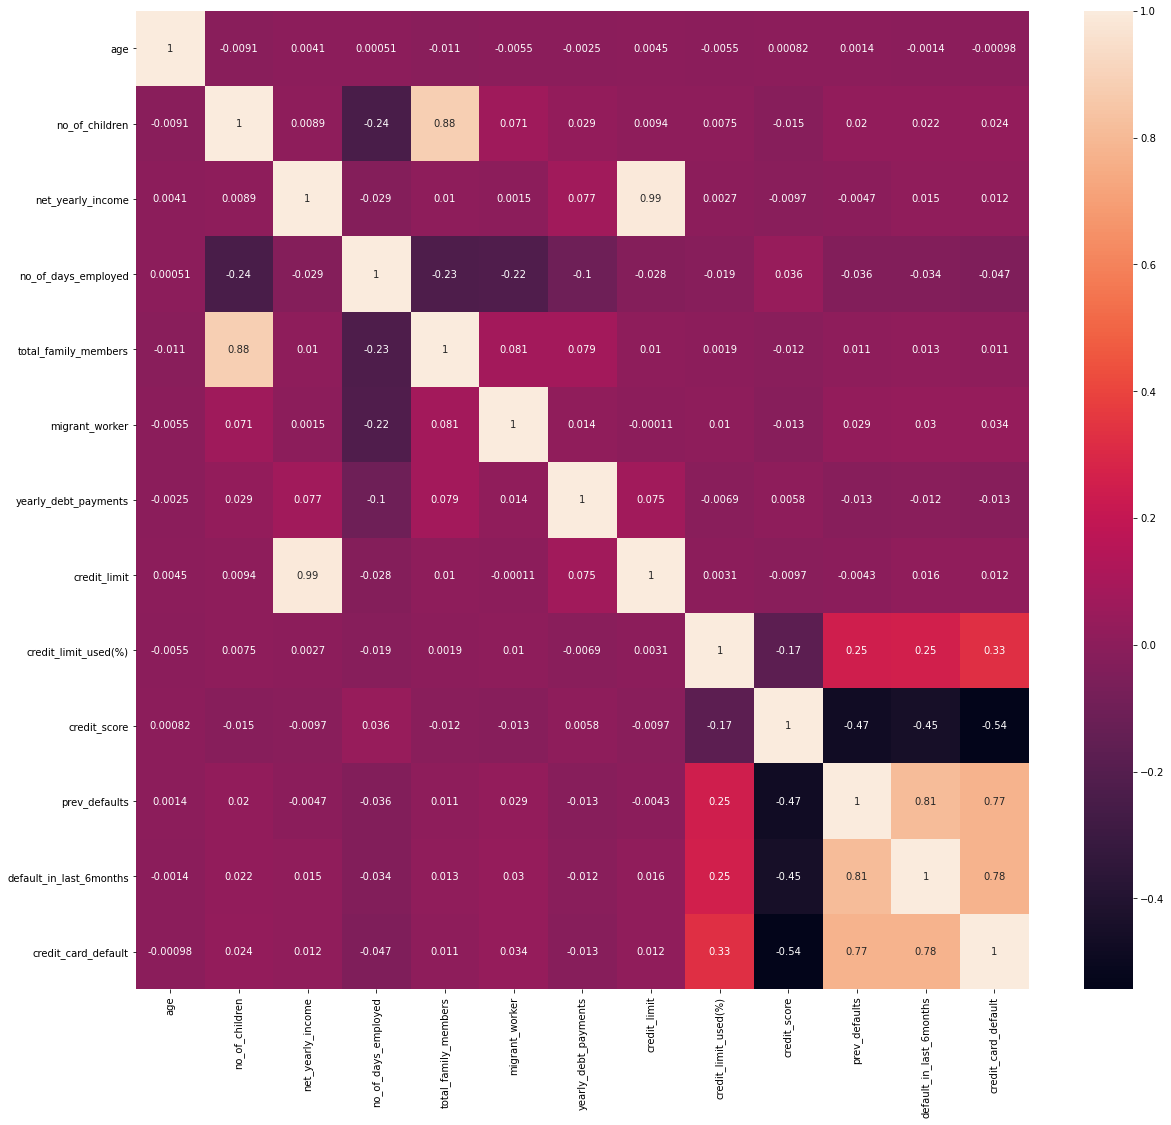

In [9]:
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), annot = True)

### corr(credit_limit and net_yearly income) == 0.99
### corr(total_family_members and no._of_children) == 0.88
### corr(prev_default and default in last 6 months) == 0.81
#
### I will drop the default in last 6 months column keeping the prev_default column because here, i will
### consider all previous defaults instead of the last 6 months

In [10]:
def outlier_limit(col):
    ''' This function takes in a column name '''
    q3,q1 = np.nanpercentile(col,[75,25])  # It computes by ignoring the nan values
    iqr = q3 - q1
    lower_limit= q1 - 1.5*iqr
    upp_limit = q3 + 1.5*iqr
    return lower_limit,upp_limit

def col_summary(col_name, df):
    out_low = outlier_limit(df[col_name])[0]
    out_up = outlier_limit(df[col_name])[1]
    num_out=df[df[col_name] > out_up].shape[0] + df[df[col_name] < out_low].shape[0]
    print('Maximum value of {} is : {}'.format(col_name,max(df[col_name])))
    print('The upper limit is : {} and the lower limit is : {} \nNo. of outliers is : {}'.format(out_up,
                                                                                    out_low, num_out))
    print('No. of missing values is : {}\n'.format(df[col_name].isnull().sum()))
    print(df[col_name].describe())

    fig,ax = plt.subplots(1,2,figsize=(12,4))
    fig.subplots_adjust(wspace = 0.4, hspace=0.5)
    sns.distplot(df[col_name], ax=ax[0]).set_title('Distribution Plot')
    sns.boxplot(df[col_name], ax=ax[1]).set_title('BoxPlot')
    
def random_impute(df, col_name):
    samples =df[col_name].dropna().sample(df[col_name].isnull().sum(),
                                          replace=True,random_state = 45)
    # samples is a pandas series randomly selected from df[col_name]
    samples.index = df[df[col_name].isnull()].index
    # samples pandas series will be reindexed to the index of nan values of df[col_name]
    df.loc[df[col_name].isnull(),col_name] = samples

In [11]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

Maximum value of credit limit is : 31129970.49
The upper limit of credit limit is : 97628.69875 
No. of outliers is : 2003
No. of missing values is : 0

Maximum value of credit limit is : 140759008.0
The Upper Limit of net_yearly_income is : 411990.650390625 
No. of outliers  is 1852
No. of missing values is : 0

       credit_limit  net_yearly_income
count  4.552800e+04       4.552800e+04
mean   4.354842e+04       2.006556e+05
std    1.487847e+05       6.690587e+05
min    4.003140e+03       2.717061e+04
25%    2.397381e+04       1.263458e+05
50%    3.568804e+04       1.717149e+05
75%    5.343576e+04       2.406038e+05
max    3.112997e+07       1.407590e+08


<AxesSubplot:xlabel='net_yearly_income'>

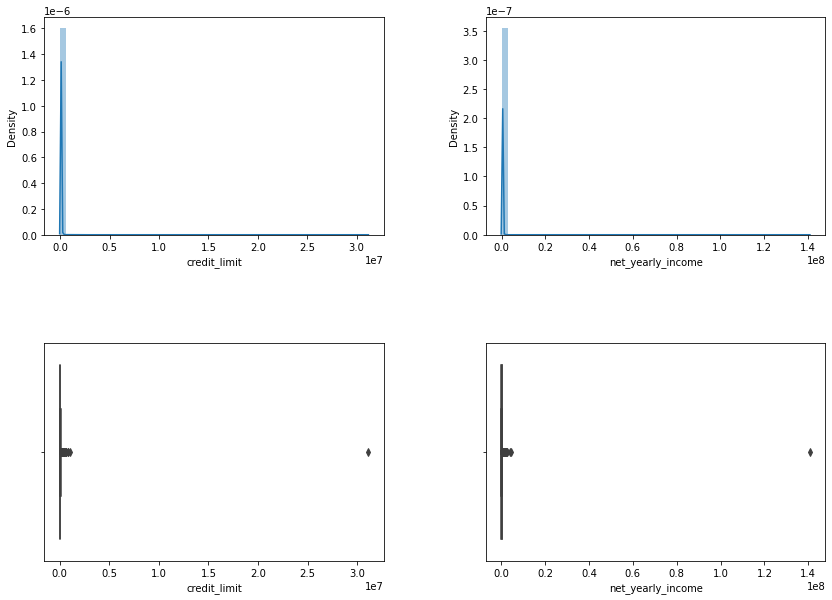

In [12]:
out = outlier_limit(df['credit_limit'])[1]
num_out=df[df['credit_limit'] > out].shape[0]
print('Maximum value of credit limit is : {}'.format(max(df['credit_limit'])))
print('The upper limit of credit limit is : {} \nNo. of outliers is : {}'.format(out, num_out))
print('No. of missing values is : {}\n'.format(df['credit_limit'].isnull().sum()))

out = outlier_limit(df['net_yearly_income'])[1]
num_out=df[df['net_yearly_income'] >out].shape[0]
print('Maximum value of credit limit is : {}'.format(max(df['net_yearly_income'])))
print('The Upper Limit of net_yearly_income is : {} \nNo. of outliers  is {}'.format(out, num_out))
print('No. of missing values is : {}\n'.format(df['net_yearly_income'].isnull().sum()))

print(df[['credit_limit', 'net_yearly_income']].describe())

fig,ax = plt.subplots(2,2,figsize=(14,10))
fig.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.distplot(df['credit_limit'], ax=ax[0,0])
sns.distplot(df['net_yearly_income'], ax=ax[0,1])
sns.boxplot(df['credit_limit'], ax=ax[1,0])
sns.boxplot(df['net_yearly_income'], ax=ax[1,1])

### I will drop the net yearly income column since both net yearly income col and credit limit share similar data

In [13]:
'''It will replace those values which are greater than upper limit to nan value'''
df['credit_limit'] = np.where(df['credit_limit']>outlier_limit(df['credit_limit'])[1],
                              np.nan,df['credit_limit'])

'''It will fill the above created nan values with upper limit'''
df['credit_limit'].fillna(outlier_limit(df['credit_limit'])[1], inplace=True)

Maximum value of credit_limit is : 97621.6
The upper limit is : 97628.69875 and the lower limit is : -20219.13125 
No. of outliers is : 0
No. of missing values is : 0

count    45528.000000
mean     40893.476786
std      22062.124402
min       4003.140000
25%      23973.805000
50%      35688.045000
75%      53435.762500
max      97621.600000
Name: credit_limit, dtype: float64


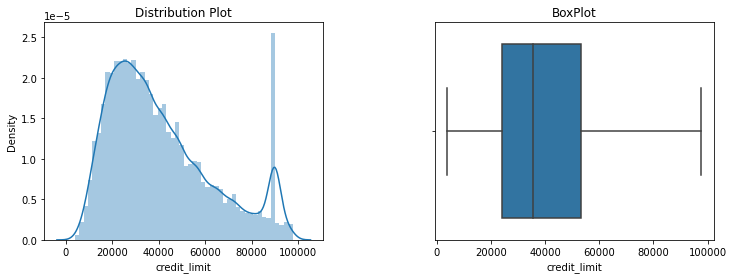

In [14]:
''' After missing value imputation and outlier treatment '''
col_summary('credit_limit', df)

Maximum value of total_family_members is : 10.0
The upper limit of total_family_members is : 4.5 
No. of outliers is : 642
No. of missing values is : 83

Maximum value of total_family_members is : 9.0
The Upper Limit of no_of_childrene is : 2.5 
No. of outliers  is 666
No. of missing values is : 774

       total_family_members  no_of_children
count          45445.000000    44754.000000
mean               2.158081        0.420898
std                0.911589        0.723633
min                1.000000        0.000000
25%                2.000000        0.000000
50%                2.000000        0.000000
75%                3.000000        1.000000
max               10.000000        9.000000


<AxesSubplot:xlabel='no_of_children'>

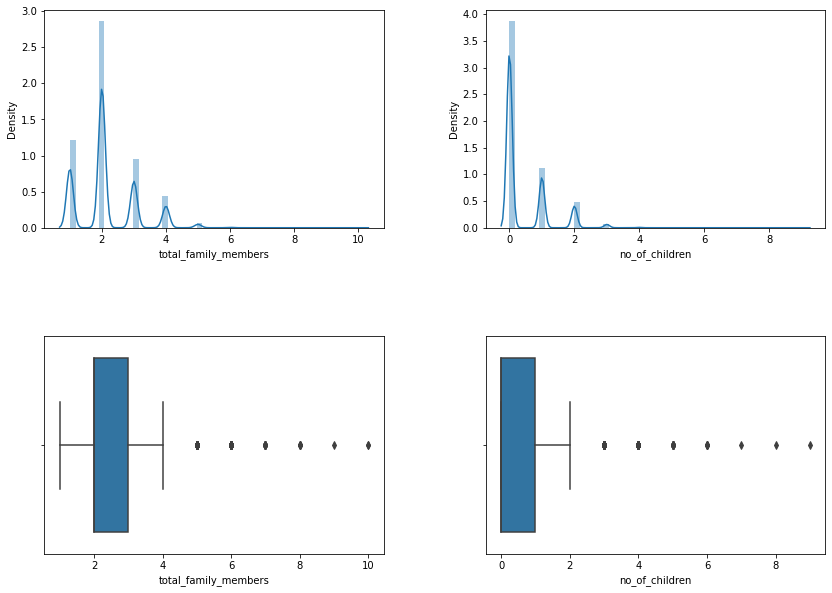

In [15]:
out = outlier_limit(df['total_family_members'])[1]
num_out=df[df['total_family_members'] > out].shape[0]
print('Maximum value of total_family_members is : {}'.format(max(df['total_family_members'])))
print('The upper limit of total_family_members is : {} \nNo. of outliers is : {}'.format(out, num_out))
print('No. of missing values is : {}\n'.format(df['total_family_members'].isnull().sum()))

out = outlier_limit(df['no_of_children'])[1]
num_out=df[df['no_of_children'] >out].shape[0]
print('Maximum value of total_family_members is : {}'.format(max(df['no_of_children'])))
print('The Upper Limit of no_of_childrene is : {} \nNo. of outliers  is {}'.format(out, num_out))
print('No. of missing values is : {}\n'.format(df['no_of_children'].isnull().sum()))

print(df[['total_family_members', 'no_of_children']].describe())

fig,ax = plt.subplots(2,2,figsize=(14,10))
fig.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.distplot(df['total_family_members'], ax=ax[0,0])
sns.distplot(df['no_of_children'], ax=ax[0,1])
sns.boxplot(df['total_family_members'], ax=ax[1,0])
sns.boxplot(df['no_of_children'], ax=ax[1,1])

# Since no of children column has more outliers and missing values, lets drop it

In [16]:
'''It will replace those values which are greater than upper limit to nan value'''
upper_family = outlier_limit(df['total_family_members'])[1]
df['total_family_members']=np.where(df['total_family_members'] > upper_family,
                              np.nan,df['total_family_members'])

'''It will random impute the nan values with the values present in the column'''
random_impute(df, 'total_family_members')

Maximum value of total_family_members is : 4.0
The upper limit is : 4.5 and the lower limit is : 0.5 
No. of outliers is : 0
No. of missing values is : 0

count    45528.000000
mean         2.115489
std          0.840224
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: total_family_members, dtype: float64


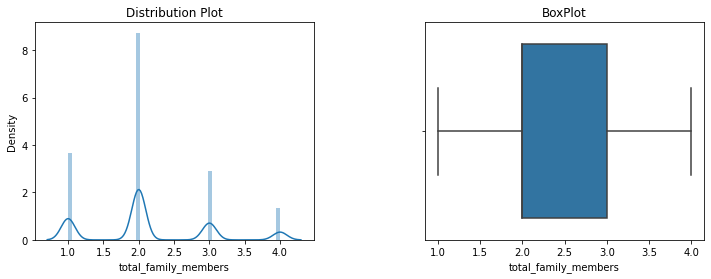

In [17]:
''' After missing value imputation and outlier treatment '''
col_summary('total_family_members', df)

In [18]:
drop_cols = ['customer_id', 'name', 'net_yearly_income', 'no_of_children', 'default_in_last_6months']
df.drop(columns = drop_cols, inplace = True)

In [19]:
''' Number of missing values '''
df.isnull().sum()

age                       0
gender                    0
owns_car                547
owns_house                0
no_of_days_employed     463
occupation_type           0
total_family_members      0
migrant_worker           87
yearly_debt_payments     95
credit_limit              0
credit_limit_used(%)      0
credit_score              8
prev_defaults             0
credit_card_default       0
dtype: int64

In [20]:
df['credit_score'].fillna(df['credit_score'].median(), inplace = True)

In [21]:
print(df.owns_car.value_counts(), df.migrant_worker.value_counts())
print('\nNo. of missing values of owns_car is : {}'.format(df['owns_car'].isnull().sum()))
print('No. of missing values of migrant worker : {}'.format(df['migrant_worker'].isnull().sum()))

N    29743
Y    15238
Name: owns_car, dtype: int64 0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64

No. of missing values of owns_car is : 547
No. of missing values of migrant worker : 87


In [22]:
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace = True)
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace = True)

Maximum value of prev_defaults is : 2
The upper limit is : 0.0 and the lower limit is : 0.0 
No. of outliers is : 2468
No. of missing values is : 0

count    45528.000000
mean         0.060710
std          0.264629
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: prev_defaults, dtype: float64


Maximum value of credit_score is : 949.0
The upper limit is : 1111.5 and the lower limit is : 459.5 
No. of outliers is : 0
No. of missing values is : 0

count    45528.000000
mean       782.791077
std        100.611115
min        500.000000
25%        704.000000
50%        786.000000
75%        867.000000
max        949.000000
Name: credit_score, dtype: float64


Maximum value of credit_limit_used(%) is : 99.0
The upper limit is : 154.5 and the lower limit is : -49.5 
No. of outliers is : 0
No. of missing values is : 0

count    45528.000000
mean        52.235020
std         29.376869
min          0.000000
25%         27.000000


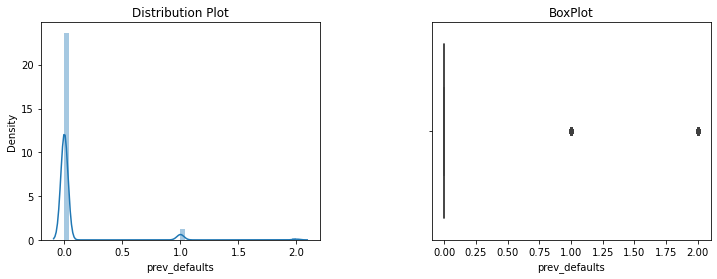

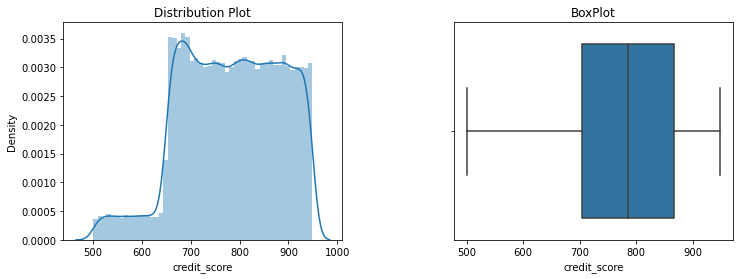

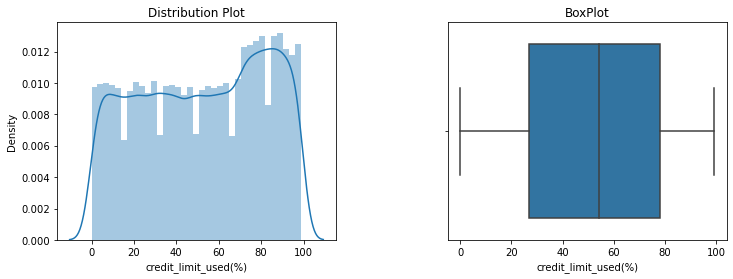

In [23]:
for i in reversed(df.columns[-4:-1]):
    col_summary(i, df)
    print('\n')

### Here the outlier for prev_defaults column does not seem significant and also there is no problem 
### for credit score and credit limit used(%) columns

Maximum value of yearly_debt_payments is : 328112.86
The upper limit is : 72556.16500000001 and the lower limit is : -12763.875000000004 
No. of outliers is : 1074
No. of missing values is : 95

count     45433.000000
mean      31796.965311
std       17269.727234
min        2237.470000
25%       19231.140000
50%       29081.650000
75%       40561.150000
max      328112.860000
Name: yearly_debt_payments, dtype: float64


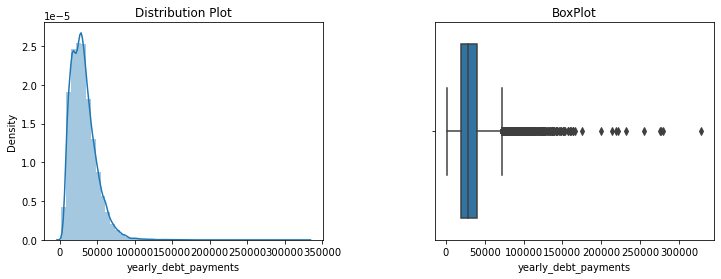

In [24]:
''' Before missing value imputation and outlier treatment '''
col_summary('yearly_debt_payments', df)

In [25]:
'''It will replace those values which are greater than upper limit to nan value'''
upper_limit = outlier_limit(df['yearly_debt_payments'])[1]
df['yearly_debt_payments']=np.where(df['yearly_debt_payments'] > upper_limit,
                              np.nan,df['yearly_debt_payments'])


''' Here i will create random samples between 60000 and 75000 and put it in the above generated and 
     already present nan values'''
num_samples = df['yearly_debt_payments'].isnull().sum()
samples = random.sample(range(60000, 75000), num_samples)
df.loc[df['yearly_debt_payments'].isnull(),'yearly_debt_payments'] = samples

Maximum value of yearly_debt_payments is : 74996.0
The upper limit is : 72793.15625 and the lower limit is : -12891.473749999994 
No. of outliers is : 165
No. of missing values is : 0

count    45528.000000
mean     31357.444573
std      15483.236559
min       2237.470000
25%      19240.262500
50%      29122.265000
75%      40661.420000
max      74996.000000
Name: yearly_debt_payments, dtype: float64


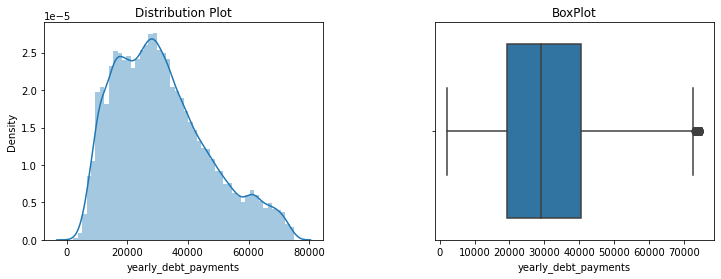

In [26]:
''' After missing value imputation and outlier treatment '''
col_summary('yearly_debt_payments', df)

#### From above, we can see that the nan values and outlier has been treated quite well

Maximum value of no_of_days_employed is : 365252.0
The upper limit is : 13138.5 and the lower limit is : -6385.5 
No. of outliers is : 8227
No. of missing values is : 463

count     45065.000000
mean      67612.171875
std      139322.953125
min           2.000000
25%         936.000000
50%        2224.000000
75%        5817.000000
max      365252.000000
Name: no_of_days_employed, dtype: float64


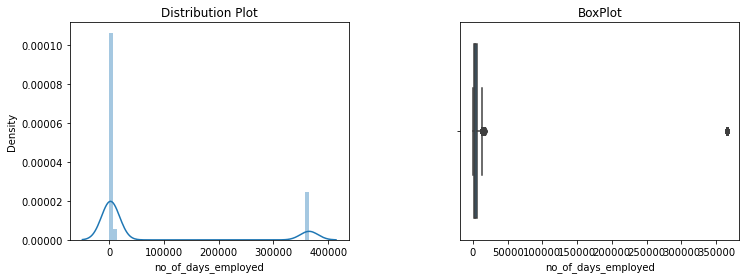

In [27]:
''' Before missing value imputation and outlier treatment '''
col_summary('no_of_days_employed',df)

#### no_of_days_employed,  this feature is very unrealistic so we have used the below process.

In [28]:
'''It will replace those values which are greater than upper limit to nan value'''

upper_limit = outlier_limit(df['no_of_days_employed'])[1]
df['no_of_days_employed']=np.where(df['no_of_days_employed'] > upper_limit,
                              np.nan,df['no_of_days_employed'])


''' Here i will create random samples between 10000 and 14000 and put it in the above generated and 
     already present nan values'''
num_samples = df['no_of_days_employed'].isnull().sum()
samples = np.arange(10000, 14000,0.3 ).astype(int)
df.loc[df['no_of_days_employed'].isnull(),'no_of_days_employed'] = samples[:num_samples]

Maximum value of yearly_debt_payments is : 74996.0
The upper limit is : 72793.15625 and the lower limit is : -12891.473749999994 
No. of outliers is : 165
No. of missing values is : 0

count    45528.000000
mean     31357.444573
std      15483.236559
min       2237.470000
25%      19240.262500
50%      29122.265000
75%      40661.420000
max      74996.000000
Name: yearly_debt_payments, dtype: float64


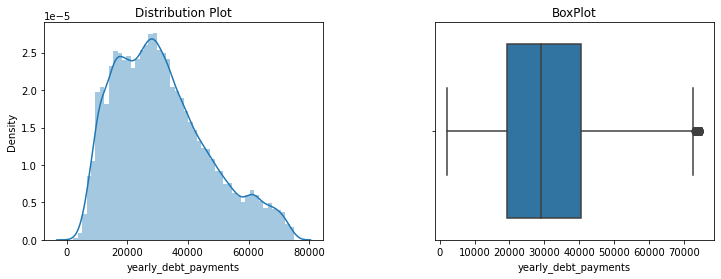

In [29]:
''' After missing value imputation and outlier treatment '''
col_summary('yearly_debt_payments', df)

#### From above, we can see that the nan values and outlier has been treated quite we

In [30]:
''' This will group the various categories in the column and take mean of the values of corresponding
     credit_card_default values '''

prob = df.groupby(['occupation_type'])['credit_card_default'].mean().sort_values()
prob

occupation_type
IT staff                 0.030303
Secretaries              0.040201
Accountants              0.052917
Core staff               0.059823
High skill tech staff    0.063615
Unknown                  0.064200
Managers                 0.067551
Private service staff    0.074935
Medicine staff           0.077647
HR staff                 0.089744
Sales staff              0.096931
Realty agents            0.099010
Security staff           0.103415
Waiters/barmen staff     0.103448
Cleaning staff           0.103759
Laborers                 0.104623
Cooking staff            0.114191
Drivers                  0.116855
Low-skill Laborers       0.157738
Name: credit_card_default, dtype: float64

In [31]:
lab_prob = {k:i for i, k in enumerate(prob.index)}
lab_prob

{'IT staff': 0,
 'Secretaries': 1,
 'Accountants': 2,
 'Core staff': 3,
 'High skill tech staff': 4,
 'Unknown': 5,
 'Managers': 6,
 'Private service staff': 7,
 'Medicine staff': 8,
 'HR staff': 9,
 'Sales staff': 10,
 'Realty agents': 11,
 'Security staff': 12,
 'Waiters/barmen staff': 13,
 'Cleaning staff': 14,
 'Laborers': 15,
 'Cooking staff': 16,
 'Drivers': 17,
 'Low-skill Laborers': 18}

### This key value will be the encoding for this column

In [32]:
''' This will map the above key value pair into the column '''
''' This is also a type of encoding which is based on the frequency of the category with respect 
     to the target label'''


df['occupation_lab']  = df['occupation_type'].map(prob).astype(float)

In [34]:
df=pd.get_dummies(df, columns=['gender', 'owns_car', 'owns_house'], drop_first = True)
x= df.drop(['occupation_type','gender_XNA', 'credit_card_default'], axis=1)
y= df['credit_card_default']

In [35]:
x.columns

Index(['age', 'no_of_days_employed', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'occupation_lab', 'gender_M',
       'owns_car_Y', 'owns_house_Y'],
      dtype='object')

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =23)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((36422, 13), (36422,), (9106, 13), (9106,))